# Essential Libraries
---
Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set() # set the default Seaborn style for graphics
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

---
# Data Acquisition and Basic Statistics
---

### Setup : Import the Dataset

Dataset from DrivenData : Richter's Predictor: Modeling Earthquake Damage

Source: https://www.drivendata.org/competitions/57/nepal-earthquake/

In [33]:
# Importing the data from the files
train_values=pd.read_csv('train_values.csv')
train_labels=pd.read_csv('train_labels.csv')

---
### Basic Exploration

In [34]:
train_values.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [35]:
train_labels.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

---
Since `building_id` is a unique and random identifier for each building in Nepal, it does not add any value for analysis and shall be removed.

In [36]:
train_values=train_values.drop('building_id',axis=1)
train_labels=train_labels.drop('building_id',axis=1)

In [37]:
train_values.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  age  \
0               6             487           12198                    2   30   
1               8             900            2812                    2   10   
2              21             363            8973                    2   10   
3              22             418           10694                    2   10   
4              11             131            1488                    3   30   

   area_percentage  height_percentage land_surface_condition foundation_type  \
0                6                  5                      t               r   
1                8                  7                      o               r   
2                5                  5                      t               r   
3                6                  5                      t               r   
4                8                  9                      t               r   

  roof_type  ... has_secondary_use_agriculture has_secondary_use_hotel  \
0         n  ...                             0                       0   
1         n  ...                             0                       0   
2         n  ...                             0                       0   
3         n  ...                             0                       0   
4         n  ...                             0                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   has_secondary_use_school  has_secondary_use_industry  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  
0                             0                        0  
1                             0                        0  
2                             0                        0  
3                             0                        0  
4                             0                        0  

[5 rows x 38 columns]

In [38]:
train_labels.head()

damage_grade
0             3
1             2
2             3
3             2
4             3

---
Here, we add the `damage_grade` column from `train_labels` to the columns of `train_values` to create a single dataframe `combined_train` for further exploration.

In [39]:
combined_train = pd.concat([train_values, train_labels], axis = 1)
combined_train.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  age  \
0               6             487           12198                    2   30   
1               8             900            2812                    2   10   
2              21             363            8973                    2   10   
3              22             418           10694                    2   10   
4              11             131            1488                    3   30   

   area_percentage  height_percentage land_surface_condition foundation_type  \
0                6                  5                      t               r   
1                8                  7                      o               r   
2                5                  5                      t               r   
3                6                  5                      t               r   
4                8                  9                      t               r   

  roof_type  ... has_secondary_use_hotel has_secondary_use_rental  \
0         n  ...                       0                        0   
1         n  ...                       0                        0   
2         n  ...                       0                        0   
3         n  ...                       0                        0   
4         n  ...                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  damage_grade  
0                        0             3  
1                        0             2  
2                        0             3  
3                        0             2  
4                        0             3  

[5 rows x 39 columns]

In [40]:
print("Data type for train_values: ", type(combined_train))
print("Data dims for train_values: ", combined_train.shape)

Data type for train_values:  <class 'pandas.core.frame.DataFrame'>
Data dims for train_values:  (260601, 39)


In [41]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non-null object
plan_configuration                        260601 no

As seen above, the dataset does not have any null values, thus no conversion of null data is required.

From the problem description, we can conclude that while some of the data types of the columns are numeric in nature as seen above, they are in fact binary variables. Hence, we have extracted the actual **continuous** features, **categorical** features and **binary** features of the dataset as follows.


---
#### Data cleaning

In [42]:
all_columns = list(train_values)
numerical_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families']
categorical_columns=['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

binary_columns=[col for col in all_columns if col not in numerical_columns]
binary_columns=[col for col in binary_columns if col not in categorical_columns]

combined_train[categorical_columns] = combined_train[categorical_columns].astype('category')

combined_train[binary_columns] = combined_train[binary_columns].astype('bool')

In [43]:
print("Continuous Features")
print()
numerical_columns

Continuous Features



['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families']

In [44]:
print("Categorical Features")
print()
categorical_columns

Categorical Features



['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [45]:
print("Binary Features")
print()
binary_columns

Binary Features



['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [46]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null category
foundation_type                           260601 non-null category
roof_type                                 260601 non-null category
ground_floor_type                         260601 non-null category
other_floor_type                          260601 non-null category
position                                  260601 non-null category
plan_configuration                     

The data is now normalised and is prepared for further exploration.

---
Moving on, we shall look at what the continuous features, categorical features and binary features of buildings mean (quoted from source) as well as their summary statistics.

In [47]:
# Summary Statistics for Continuous variables
combined_train[numerical_columns].describe().T

count         mean          std  min     25%     50%  \
geo_level_1_id       260601.0    13.900353     8.033617  0.0     7.0    12.0   
geo_level_2_id       260601.0   701.074685   412.710734  0.0   350.0   702.0   
geo_level_3_id       260601.0  6257.876148  3646.369645  0.0  3073.0  6270.0   
count_floors_pre_eq  260601.0     2.129723     0.727665  1.0     2.0     2.0   
age                  260601.0    26.535029    73.565937  0.0    10.0    15.0   
area_percentage      260601.0     8.018051     4.392231  1.0     5.0     7.0   
height_percentage    260601.0     5.434365     1.918418  2.0     4.0     5.0   
count_families       260601.0     0.983949     0.418389  0.0     1.0     1.0   

                        75%      max  
geo_level_1_id         21.0     30.0  
geo_level_2_id       1050.0   1427.0  
geo_level_3_id       9412.0  12567.0  
count_floors_pre_eq     2.0      9.0  
age                    30.0    995.0  
area_percentage         9.0    100.0  
height_percentage       6.0     32.0  
count_families          1.0      9.0

- `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
- `count_floors_pre_eq` (type: int): number of floors in the building before the earthquake.
- `age` (type: int): age of the building in years.
- `area_percentage` (type: int): normalized area of the building footprint.
- `height_percentage` (type: int): normalized height of the building footprint.
- `count_families` (type: int): number of families that live in the building.

In [48]:
# Summary statistics for Categorical variables
combined_train[categorical_columns].describe().T

count unique top    freq
land_surface_condition  260601      3   t  216757
foundation_type         260601      5   r  219196
roof_type               260601      3   n  182842
ground_floor_type       260601      5   f  209619
other_floor_type        260601      4   q  165282
position                260601      4   s  202090
plan_configuration      260601     10   d  250072
legal_ownership_status  260601      4   v  250939

- `land_surface_condition` (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- `foundation_type` (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- `roof_type` (type: categorical): type of roof used while building. Possible values: n, q, x.
- `ground_floor_type` (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- `other_floor_type` (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
- `position` (type: categorical): position of the building. Possible values: j, o, s, t.
- `plan_configuration` (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- `legal_ownership_status` (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.

In [49]:
# Summary statistics for Binary variables
combined_train[binary_columns].describe().T

count unique    top    freq
has_superstructure_adobe_mud            260601      2  False  237500
has_superstructure_mud_mortar_stone     260601      2   True  198561
has_superstructure_stone_flag           260601      2  False  251654
has_superstructure_cement_mortar_stone  260601      2  False  255849
has_superstructure_mud_mortar_brick     260601      2  False  242840
has_superstructure_cement_mortar_brick  260601      2  False  240986
has_superstructure_timber               260601      2  False  194151
has_superstructure_bamboo               260601      2  False  238447
has_superstructure_rc_non_engineered    260601      2  False  249502
has_superstructure_rc_engineered        260601      2  False  256468
has_superstructure_other                260601      2  False  256696
has_secondary_use                       260601      2  False  231445
has_secondary_use_agriculture           260601      2  False  243824
has_secondary_use_hotel                 260601      2  False  251838
has_secondary_use_rental                260601      2  False  258490
has_secondary_use_institution           260601      2  False  260356
has_secondary_use_school                260601      2  False  260507
has_secondary_use_industry              260601      2  False  260322
has_secondary_use_health_post           260601      2  False  260552
has_secondary_use_gov_office            260601      2  False  260563
has_secondary_use_use_police            260601      2  False  260578
has_secondary_use_other                 260601      2  False  259267

- `has_superstructure_adobe_mud` (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- `has_superstructure_mud_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- `has_superstructure_stone_flag` (type: binary): flag variable that indicates if the superstructure was made of Stone.
- `has_superstructure_cement_mortar_stone`(type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- `has_superstructure_mud_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- `has_superstructure_cement_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- `has_superstructure_timber` (type: binary): flag variable that indicates if the superstructure was made of Timber.
- `has_superstructure_bamboo` (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- `has_superstructure_rc_non_engineered` (type: binary): flag variable that -indicates if the superstructure was made of non-engineered reinforced concrete.
- `has_superstructure_rc_engineered` (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- `has_superstructure_other` (type: binary): flag variable that indicates if the superstructure was made of any other material.
- `has_secondary_use` (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- `has_secondary_use_agriculture` (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- `has_secondary_use_hotel` (type: binary): flag variable that indicates if the building was used as a hotel.
- `has_secondary_use_rental` (type: binary): flag variable that indicates if the building was used for rental purposes.
- `has_secondary_use_institution` (type: binary): flag variable that indicates if the building was used as a location of any institution.
- `has_secondary_use_school` (type: binary): flag variable that indicates if the building was used as a school.
- `has_secondary_use_industry` (type: binary): flag variable that indicates if the building was used for industrial purposes.
- `has_secondary_use_health_post` (type: binary): flag variable that indicates if the building was used as a health post.
- `has_secondary_use_gov_office` (type: binary): flag variable that indicates if the building was used fas a government office.
- `has_secondary_use_use_police` (type: binary): flag variable that indicates if the building was used as a police station.
- `has_secondary_use_other` (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

---
# Exploratory Analysis and Data Visualisation
----
In this section, we aim to find the relationship between damage grade against different features of the buildings, so that we can find out the features that may affect the level of damage of the buildings.

---
First, we create a count plot to find the exact distribution of the `damage_grade` of buildings.

 `damage_grade` is an ordinal variable, in this case the lower the value, the lower the level of damage to the building. There are 3 grades of the damage:
- `1` represents low damage (also represented as `Low damage`)
- `2` represents a medium amount of damage (also represented as `Avg damage`)
- `3` represents almost complete destruction (also represented as `High damage`)

Text(0.5, 1.0, 'Damage Grade')

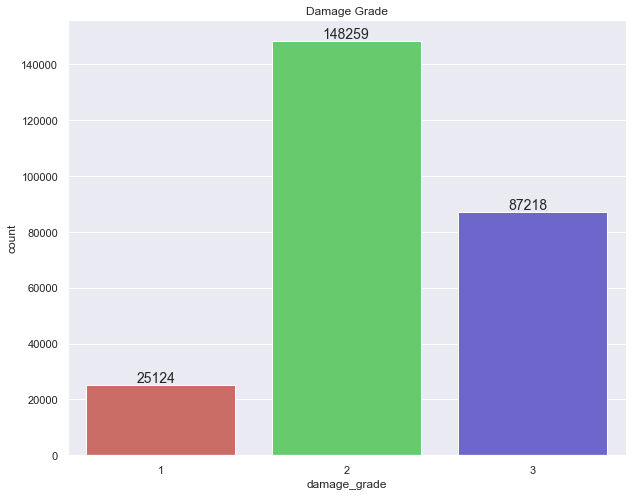

In [50]:
# Plotting the count of damage grade
plt.figure(figsize=(10,8))
a=sb.countplot("damage_grade",data=combined_train, palette='hls')
for i in a.patches:
    a.text(i.get_x()+0.27, i.get_height()+1000, \
            str(round((i.get_height()), 2)), fontsize=14)
plt.title("Damage Grade")

Based on the count plot above, it can be seen that most buildings suffered medium damage followed by maximum damage and least damage. This means that we can expect most of the dataset to be more concentrated towards medium-damaged buildings followed by maximum-damaged and least damaged. 

So, we should keep an eye out for features where proportions of different `damage_grade` are different across different classes. 

- This is because if the various classes of a single feature have relatively different proportions of damage grades, there is a chance that the difference in damage grades are actually attributed to the various classes.

We will now further explore using the different data types.

---
## Continuous features vs damage_grade
---
### Finding out if geographical location affects the damage grade
Note that for geographical location, we do not include the more specific geo ids. (i.e. geo_level_2_id and geo_level_3_id)

- The area specificity increases with level 1, 2, 3 (i.e area specified becomes more narrow)
- Based on past attempts, there is a very wide range of level 2/3 ids and very few buildings sharing the same id.
- Hence, comparing number of buildings in geo level 2/3 ids give us no insights.
---
`geo_level_1_id` vs `damage_grade`

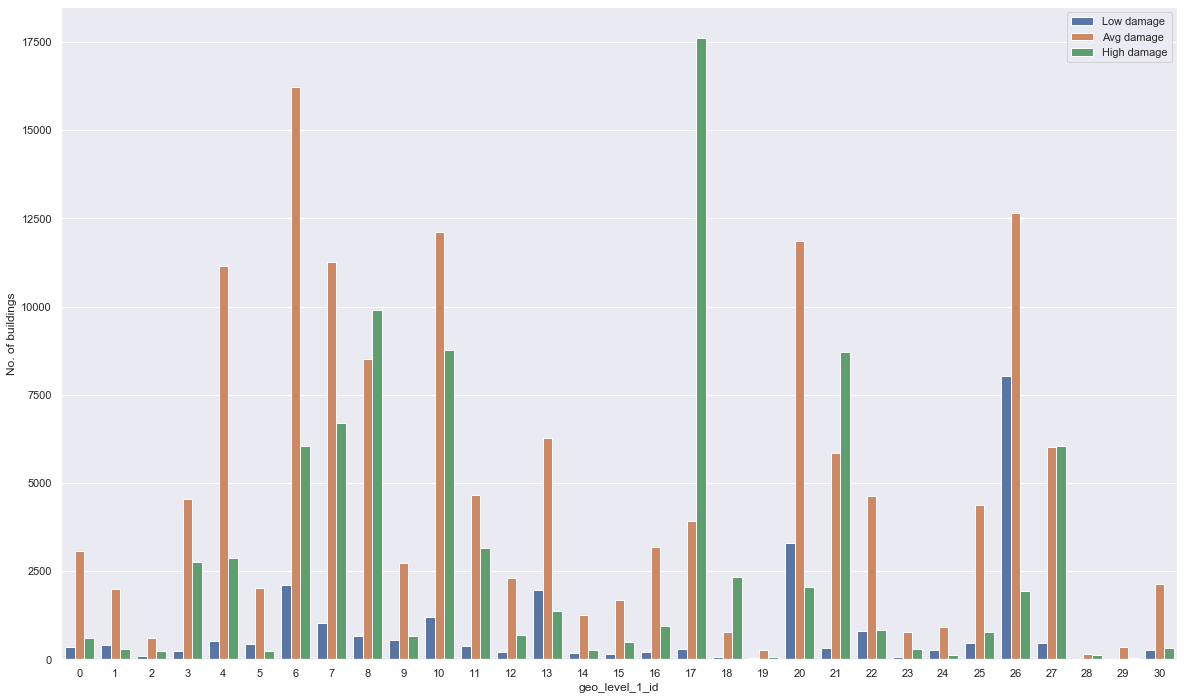

In [51]:
plt.figure(figsize=(20,12))
sb.countplot(x=combined_train['geo_level_1_id'],hue=combined_train["damage_grade"])
plt.ylabel("No. of buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.show()

Text(0, 0.5, 'No. of buildings')

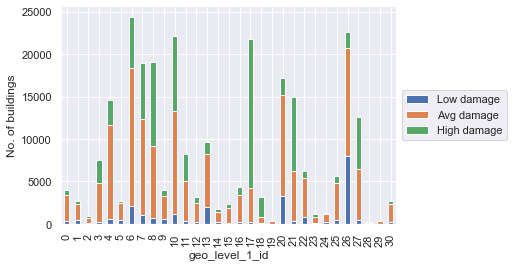

In [52]:
stacked_df=pd.crosstab(combined_train['geo_level_1_id'],combined_train['damage_grade'])
stacked_df.plot(kind='bar', stacked=True)
plt.legend(["Low damage","Avg damage","High damage"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("No. of buildings")

Based on the plots above, we can observe that `geo_level_1_id` values `4, 6, 7, 8, 10, 17, 20, 21, 26` and `27` have higher number of buildings compared to other values, hence we can conclude that locations among these values of `geo_level_1_id` were more densely populated with buildings. 

Interestingly, at `geo_level_1_id` values `8, 17, 18` and `21`, the proportion of buildings which had `High damage` were the largest. This either mean that the epicentre of the earthquake was nearer to the geographical region where these buildings are located such that the level of damage was higher, or that the buildings in these locations had or did not have features that contributed to higher level of damage. We shall further explore that in detail.

Furthermore, at `geo_level_1_id` values `13, 20` and `26`, the number of buildings which had `Low damage` were significantly larger than the number of buildings with `High damage`. Hence, we should also focus on buildings in these 3 level 1 ids to see if certain features of the buildings helped to reduce the level of damage.

In [53]:
high_damage = ['8','17','18','21']
high_damage_DF=combined_train[combined_train['geo_level_1_id'].isin(high_damage)]
high_damage_DF.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  age  \
1                8             900            2812                    2   10   
2               21             363            8973                    2   10   
5                8             558            6089                    2   10   
10              17            1119           12188                    2   20   
11              17            1275            4004                    1   10   

    area_percentage  height_percentage land_surface_condition foundation_type  \
1                 8                  7                      o               r   
2                 5                  5                      t               r   
5                 9                  5                      t               r   
10                9                  6                      t               r   
11                8                  4                      t               u   

   roof_type  ... has_secondary_use_hotel has_secondary_use_rental  \
1          n  ...                   False                    False   
2          n  ...                   False                    False   
5          n  ...                   False                    False   
10         q  ...                   False                    False   
11         n  ...                   False                    False   

   has_secondary_use_institution has_secondary_use_school  \
1                          False                    False   
2                          False                    False   
5                          False                    False   
10                         False                    False   
11                         False                    False   

    has_secondary_use_industry  has_secondary_use_health_post  \
1                        False                          False   
2                        False                          False   
5                        False                          False   
10                       False                          False   
11                       False                          False   

    has_secondary_use_gov_office  has_secondary_use_use_police  \
1                          False                         False   
2                          False                         False   
5                          False                         False   
10                         False                         False   
11                         False                         False   

    has_secondary_use_other  damage_grade  
1                     False             2  
2                     False             3  
5                     False             2  
10                    False             3  
11                    False             2  

[5 rows x 39 columns]

In [54]:
low_damage = ['13','20','26']
low_damage_DF=combined_train[combined_train['geo_level_1_id'].isin(low_damage)]
low_damage_DF.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  age  \
7               20             323           12236                    2    0   
9               26             886             994                    1    0   
18              26            1401            3904                    1   20   
31              20             953            6651                    2   15   
36              13             305            5956                    2    0   

    area_percentage  height_percentage land_surface_condition foundation_type  \
7                 8                  6                      t               w   
9                13                  4                      t               i   
18               12                  3                      t               u   
31               13                  5                      t               w   
36                9                  8                      t               r   

   roof_type  ... has_secondary_use_hotel has_secondary_use_rental  \
7          q  ...                   False                    False   
9          n  ...                   False                    False   
18         n  ...                   False                    False   
31         q  ...                   False                    False   
36         q  ...                   False                    False   

   has_secondary_use_institution has_secondary_use_school  \
7                          False                    False   
9                          False                    False   
18                         False                    False   
31                         False                    False   
36                         False                    False   

    has_secondary_use_industry  has_secondary_use_health_post  \
7                        False                          False   
9                        False                          False   
18                       False                          False   
31                       False                          False   
36                       False                          False   

    has_secondary_use_gov_office  has_secondary_use_use_police  \
7                          False                         False   
9                          False                         False   
18                         False                         False   
31                         False                         False   
36                         False                         False   

    has_secondary_use_other  damage_grade  
7                     False             1  
9                     False             1  
18                    False             2  
31                    False             2  
36                    False             1  

[5 rows x 39 columns]

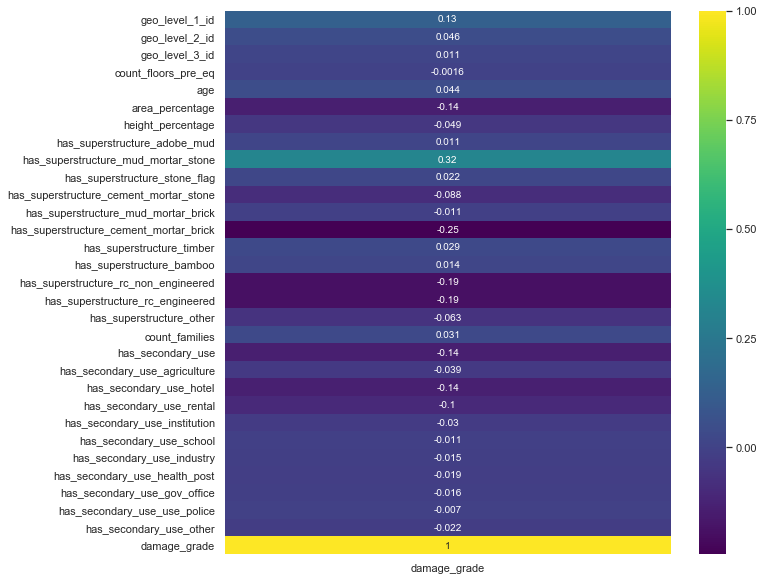

In [55]:
plt.figure(figsize=(10,10))
cor = high_damage_DF.corr()["damage_grade"]
cor = pd.DataFrame(cor)
sb.heatmap(cor,annot=True,cmap="viridis")

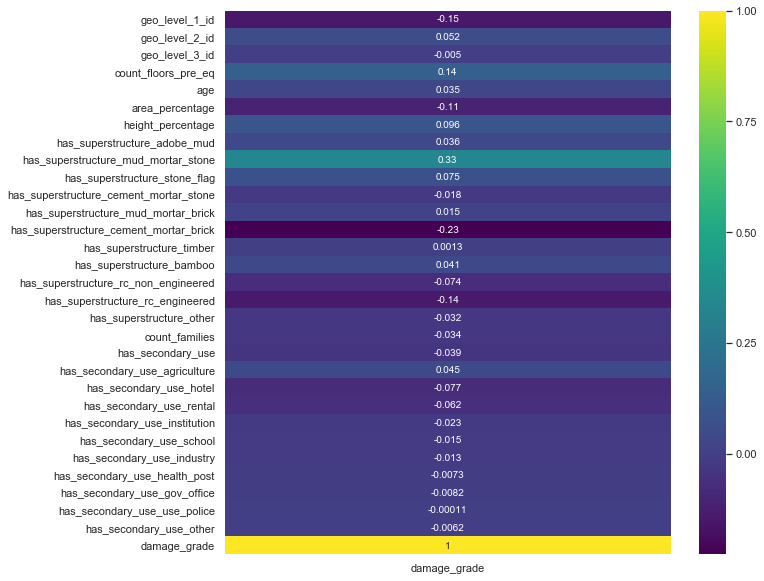

In [56]:
plt.figure(figsize=(10,10))
cor =  low_damage_DF.corr()["damage_grade"]
cor = pd.DataFrame(cor)
sb.heatmap(cor,annot=True,cmap="viridis")

Positive correlation values: the presence of a specific feature is likely to increase the `damage_grade`

Negative correlation values: the presence of a specific feature is likely to decrease the `damage_grade`

In both correlation heatmaps, we can observe that there are no correlation coefficients that suggest that any building features had a strong linear relationship with `damage_grade`. 

The only notable features are (top 3 values with highest overall absolute coefficient between the two heatmaps):  
- Continous features: `geo_level_1_id` ,`count_floors_pre_eq`, `area_percentage`
- Binary features: `has_superstructure_mortar_stone`, `has_superstructure_cement_mortar_brick`, `has_superstructure_rc_engineered`

Thus, more exploratory analysis should be carried out to find out the important features of a building that may influence `damage_grade`.

---
### Finding out if remaining continuous features (age, area, etc.) affects the damage grade

---
`age` vs `damage_grade`

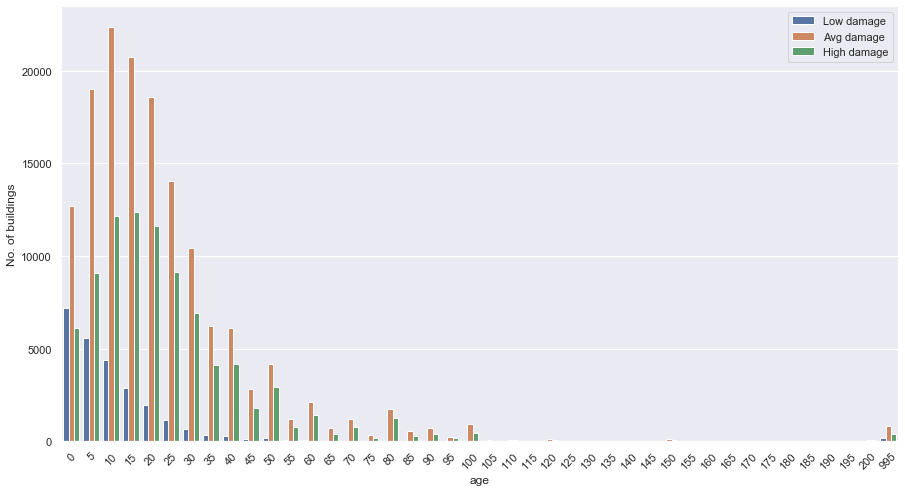

In [57]:
plt.figure(figsize=(15, 8))
sb.countplot(x=combined_train['age'],hue=combined_train["damage_grade"])
plt.ylabel("No. of buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'age')

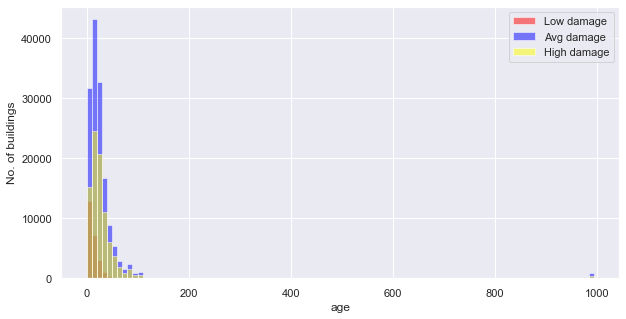

In [58]:
plt.figure(figsize=(10,5))
combined_train[combined_train['damage_grade']==1]['age'].hist(alpha=0.5,color='red',
                                              bins=100,label='Low damage')
combined_train[combined_train['damage_grade']==2]['age'].hist(alpha=0.5,color='blue',
                                              bins=100,label='Avg damage')
combined_train[combined_train['damage_grade']==3]['age'].hist(alpha=0.5,color='yellow',
                                              bins=100,label='High damage')
plt.legend()
plt.ylabel("No. of buildings")
plt.xlabel("age")

Several observations can be extracted:
- Majority of the buildings are age 50 and below.
- Based on the chart above, we can see that despite the old age of building, it does not mean that there is almost complete destruction to the buildings as seen where most of the older buildings are in the category of medium damage.
- The number of buildings with low damage decreases as age increases. This means that newer buildings tend to be able to withstand more damage from earthquakes, most likely due to less wear and tear of the buildings and buildings being constructed with more advanced technology.

---
`area_percentage` vs `damage_grade`

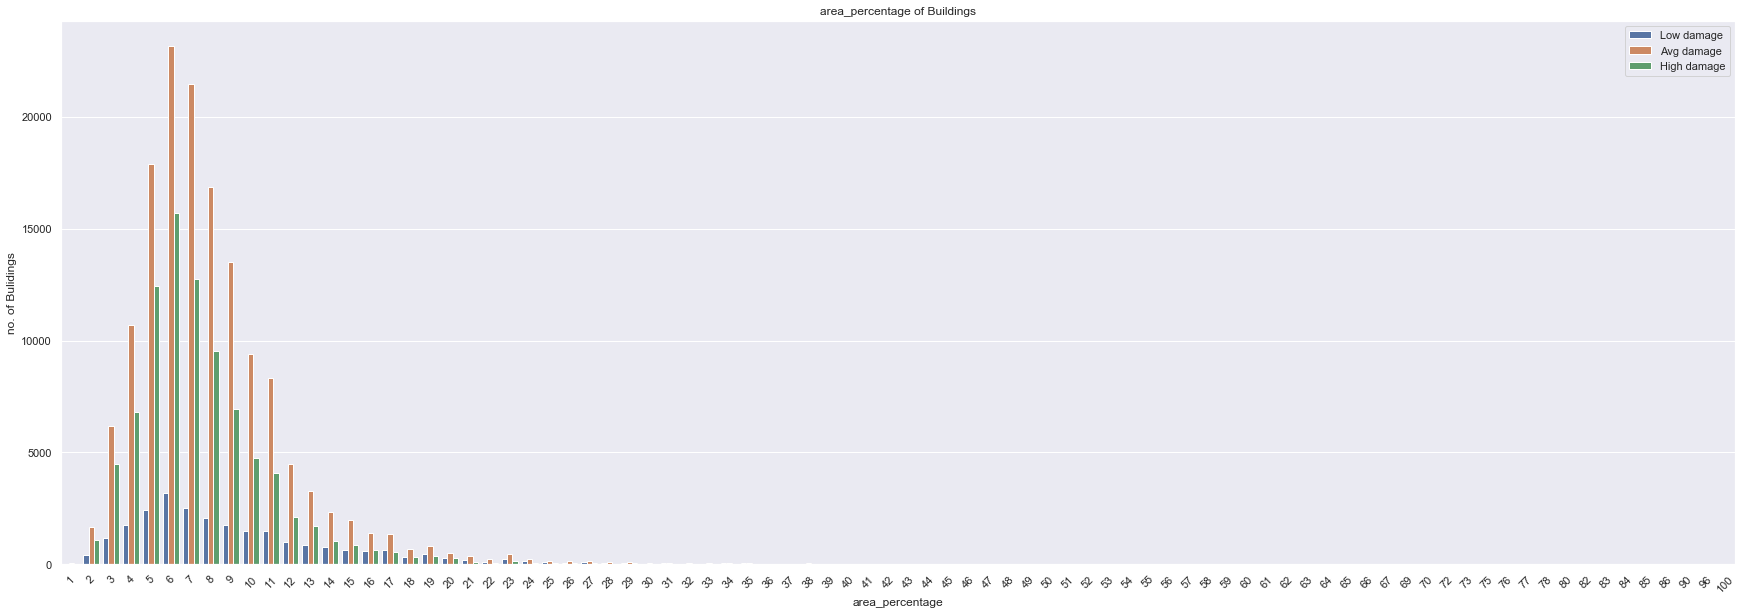

In [60]:
#plotting area_percentage of building
plt.figure(figsize=(30,10))
sb.countplot(x=combined_train["area_percentage"],hue=combined_train["damage_grade"])
plt.ylabel("no. of Bulidings")
plt.title("area_percentage of Buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

In [62]:
#fig = px.violin(combined_train, y="area_percentage",x='damage_grade', box=True, color="damage_grade", points='all')
#fig.show()

---
`height_percentage` vs `damage_grade`

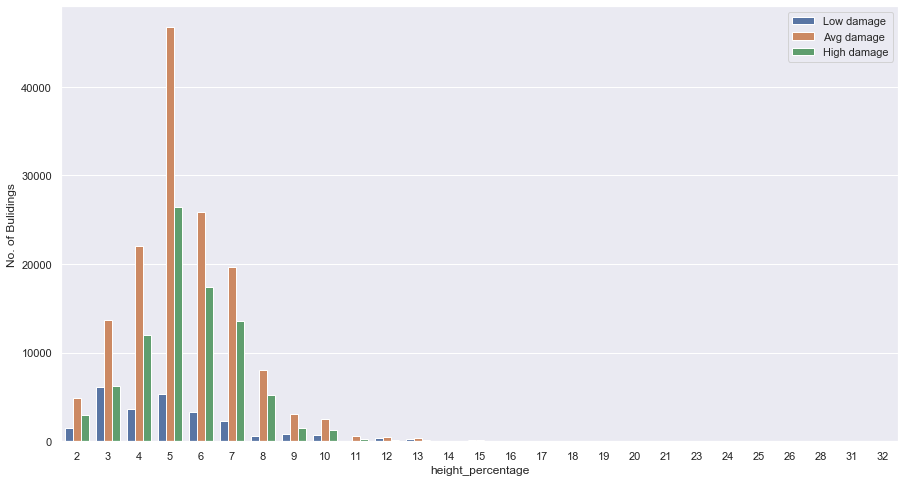

In [30]:
plt.figure(figsize=(15,8))
sb.countplot(x=combined_train["height_percentage"],hue=combined_train["damage_grade"])
plt.ylabel("No. of Bulidings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.show()

In [31]:
#fig = px.violin(combined_train, y="height_percentage",x='damage_grade', box=True, color="damage_grade", points='all')
#fig.show()

# An interesting observation

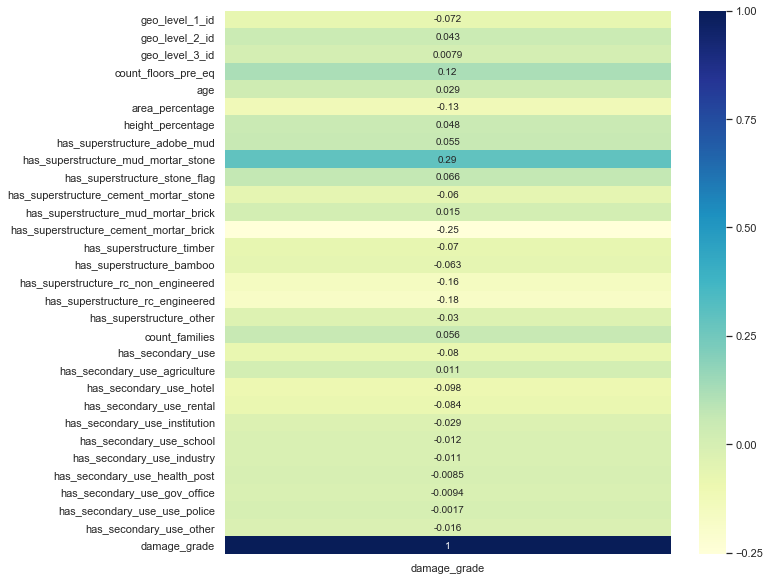

In [9]:
plt.figure(figsize=(10,10))
cor=combined_train.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sb.heatmap(cor,annot=True,cmap="YlGnBu")

As it can be seen above, the correlation of area_percentage=-0.13 and height_percentage=0.048.
However, combining these two features gives a new feature with better negative correlation than both of them.

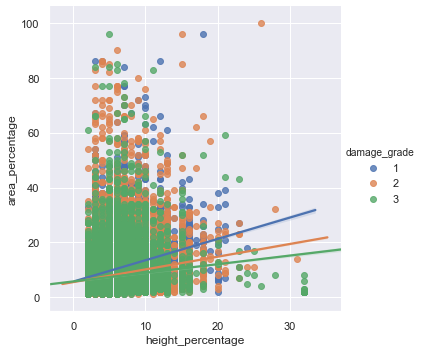

In [11]:
sb.lmplot(y='area_percentage',x='height_percentage',data=combined_train,hue='damage_grade')

In [20]:
combined_train['ratio']=combined_train['area_percentage']/ combined_train['height_percentage']

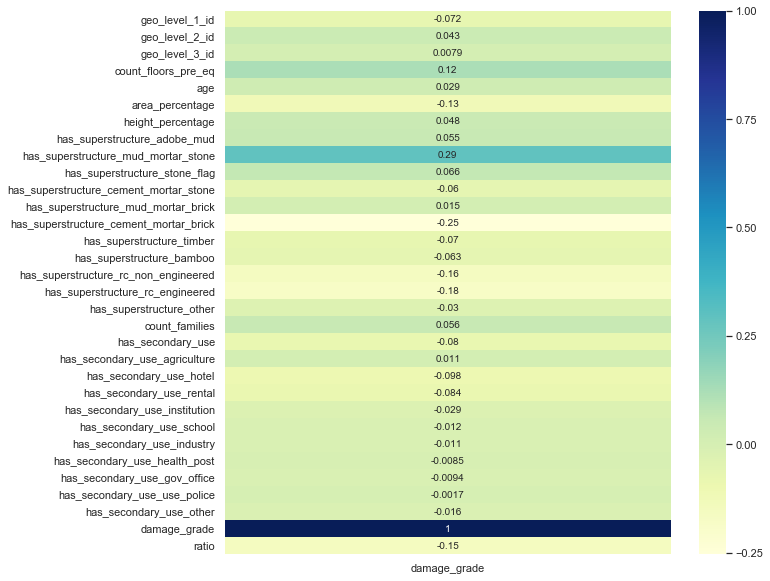

In [15]:
plt.figure(figsize=(10,10))
cor=combined_train.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sb.heatmap(cor,annot=True,cmap="YlGnBu")

---
`count_floors_pre_eq` vs `damage_grade`

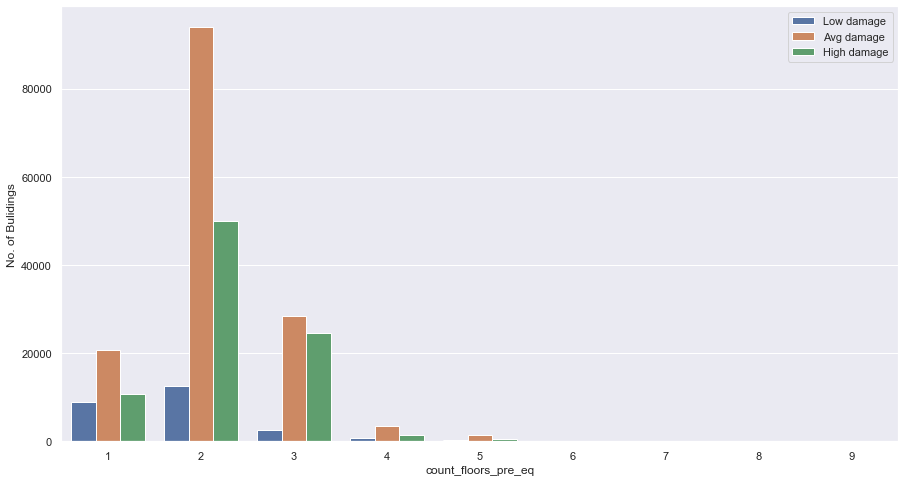

In [32]:
plt.figure(figsize=(15,8))
sb.countplot(x=combined_train["count_floors_pre_eq"],hue=combined_train["damage_grade"])
plt.ylabel("No. of Bulidings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.show()

---
## Categorical features vs damage_grade
---
For categorical features, we will create count plots to check whether a certain category of feature result in different proportions of `damage_grade`.

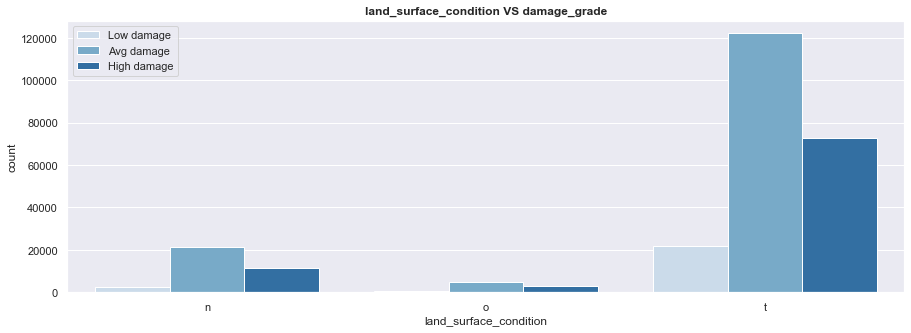

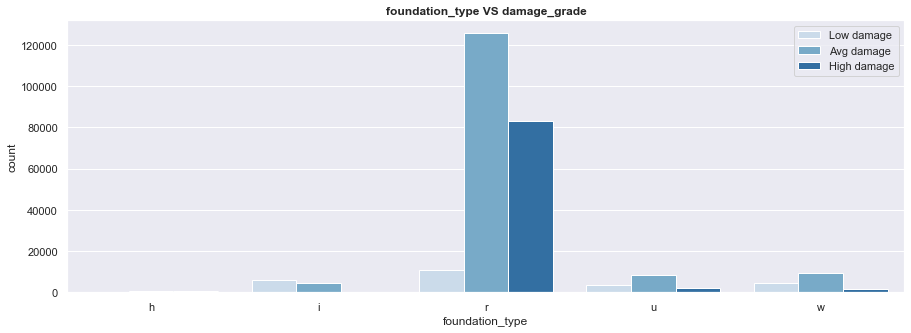

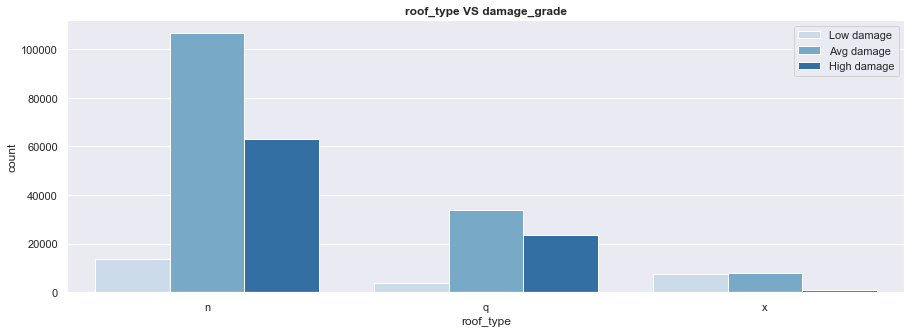

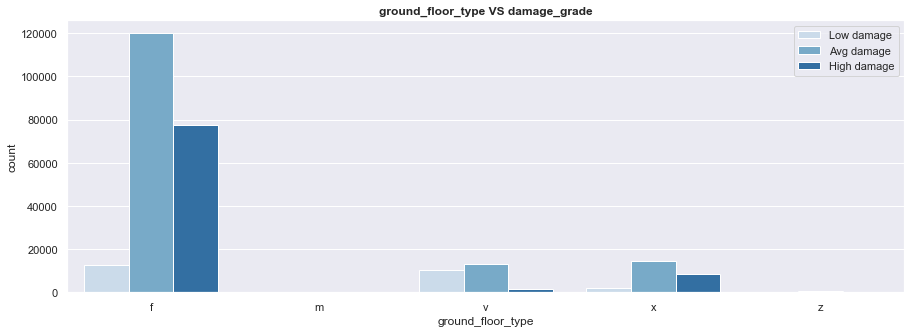

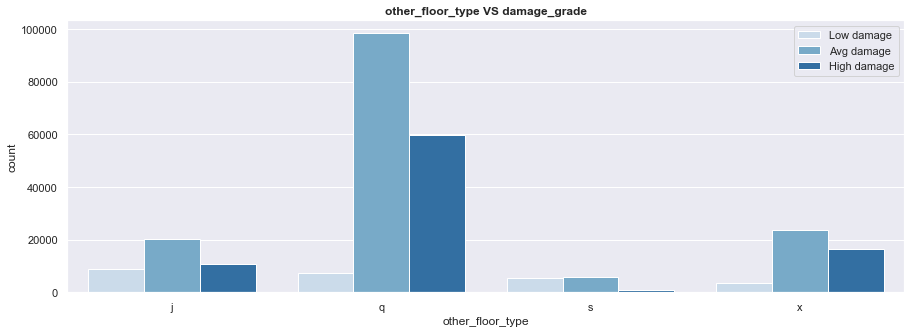

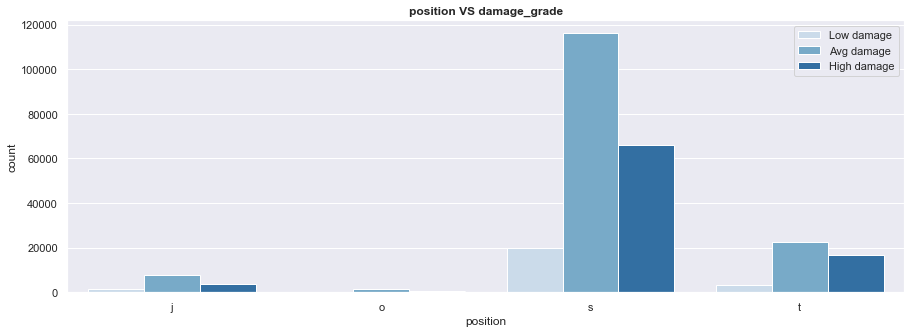

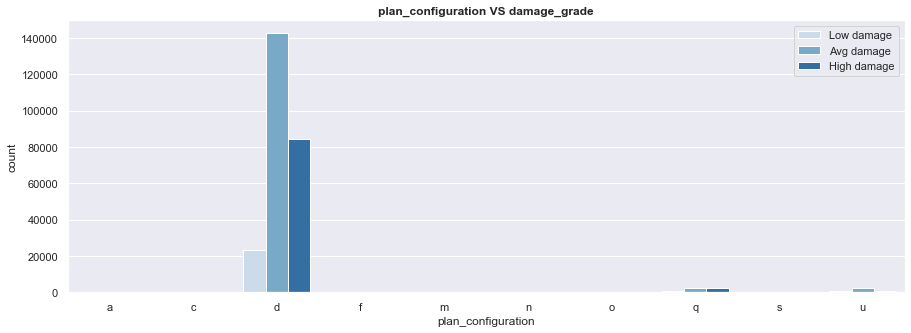

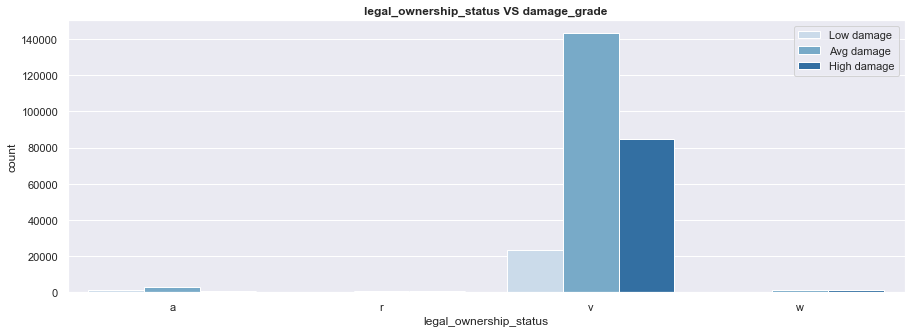

In [16]:
for col in categorical_columns:
    plt.figure(figsize=(15,5))
    sb.countplot(combined_train[col],hue=combined_train['damage_grade'],palette="Blues")
    plt.title(col+ " VS damage_grade",fontweight="bold")
    plt.legend(["Low damage","Avg damage","High damage"]) 
    plt.show()

The classes in the various features are highly imbalanced and thus we cannot conclude which class is the best directly.

---
## Binary features vs damage_grade

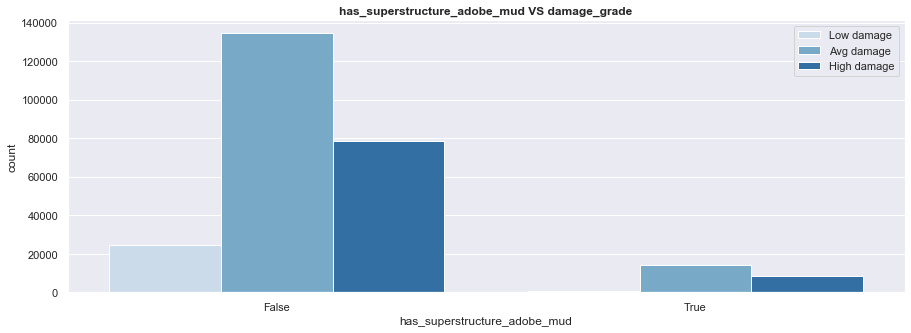

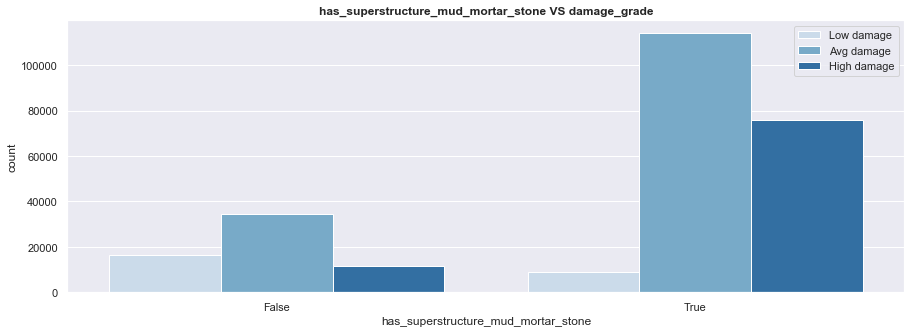

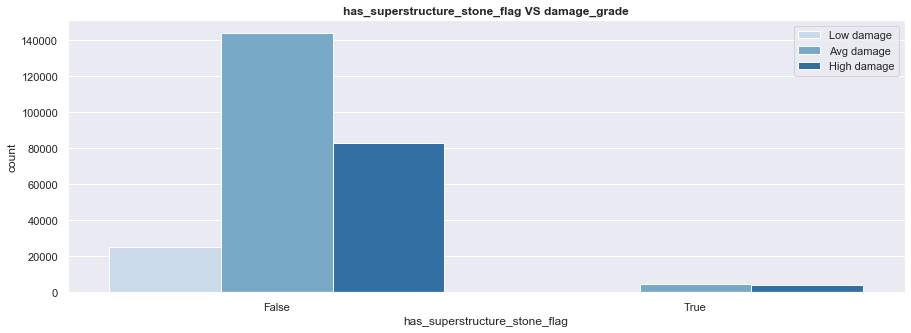

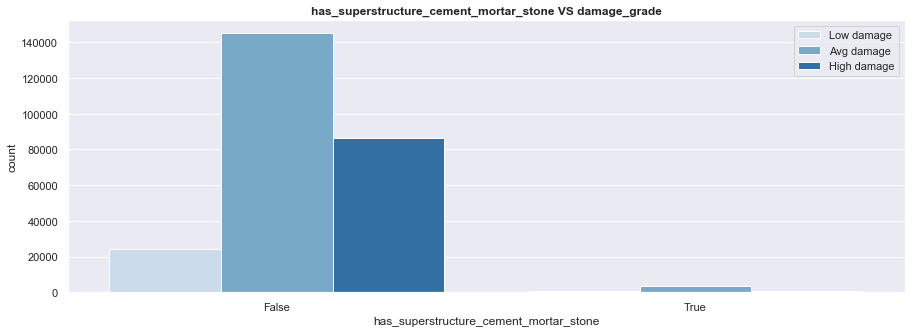

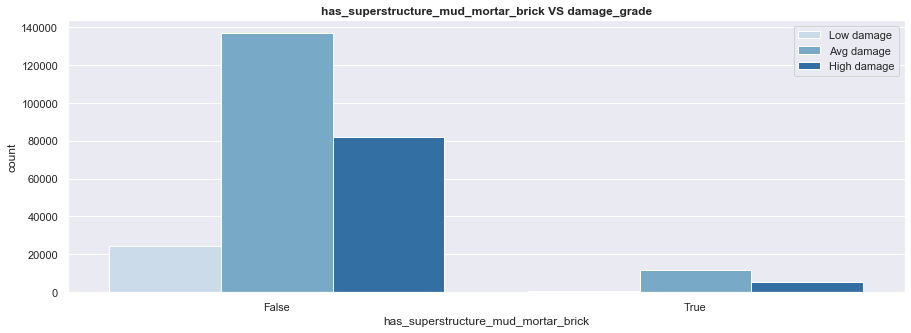

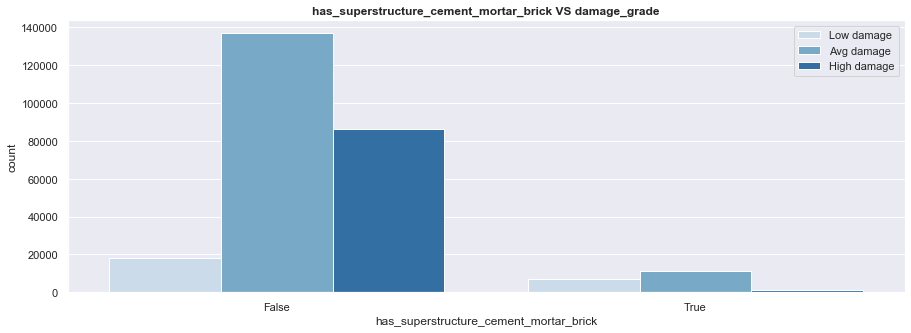

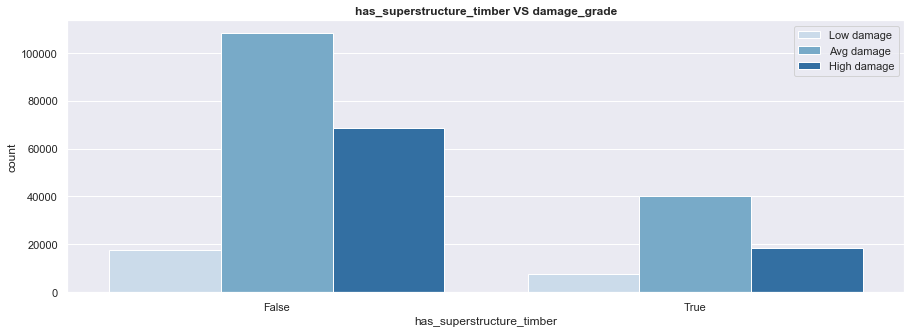

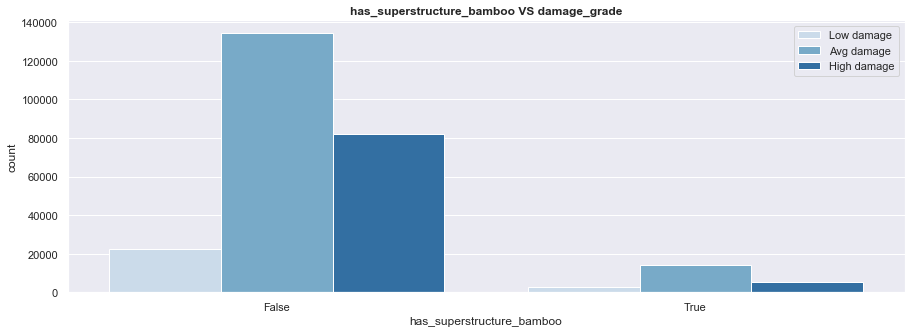

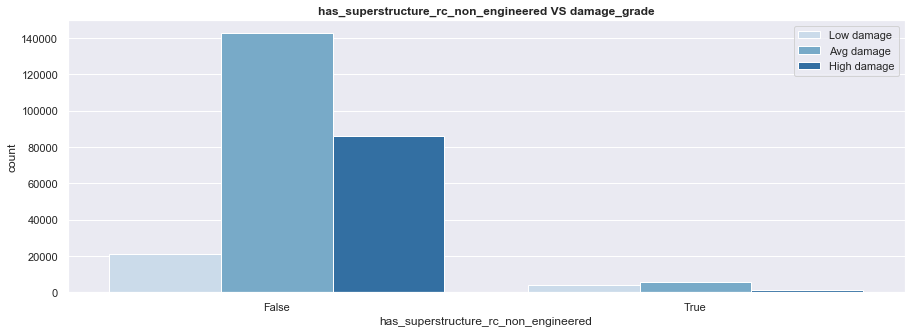

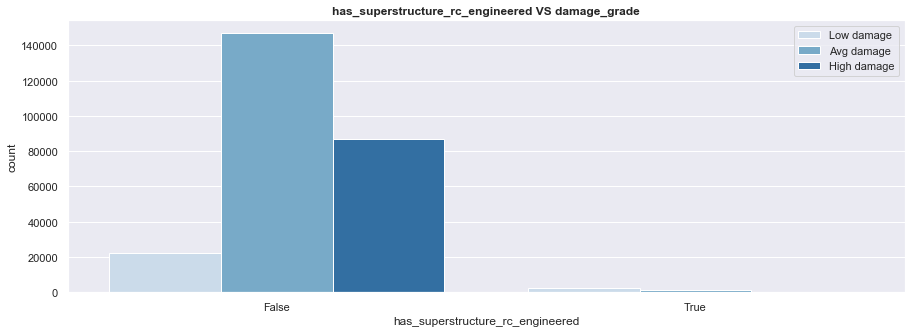

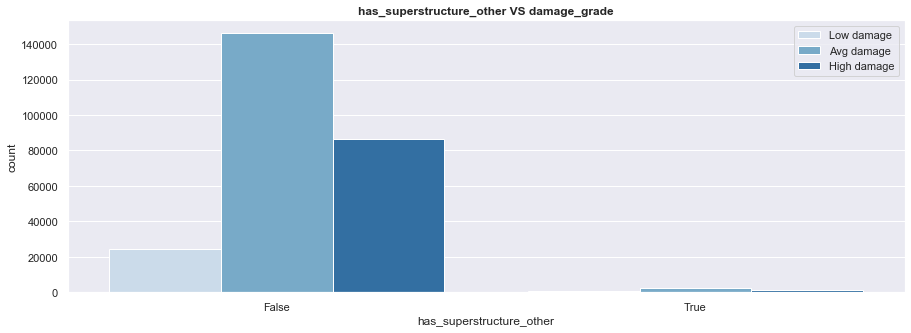

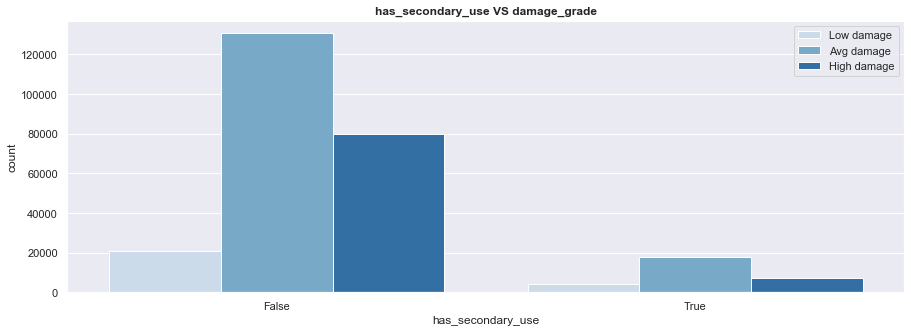

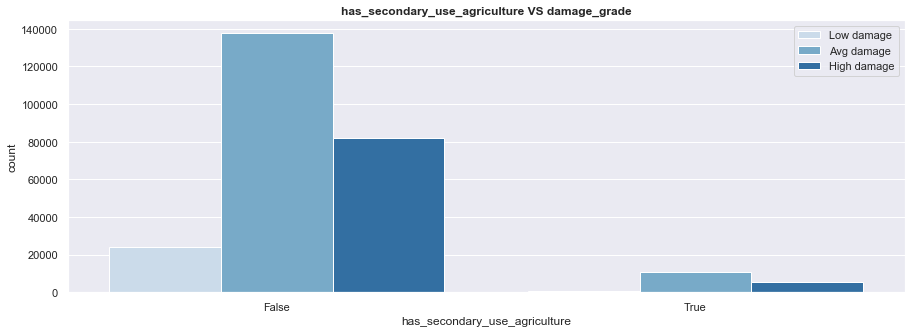

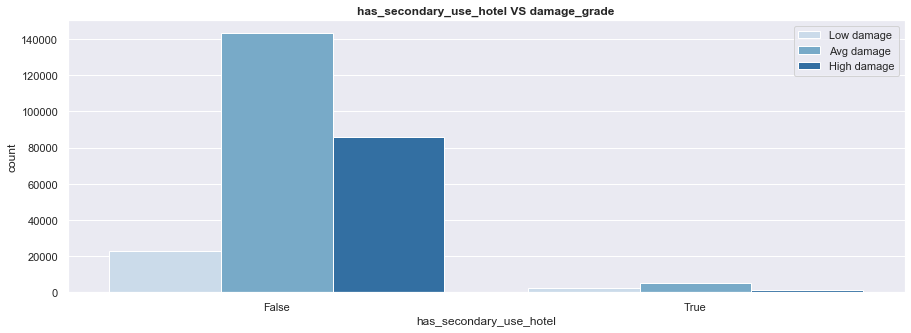

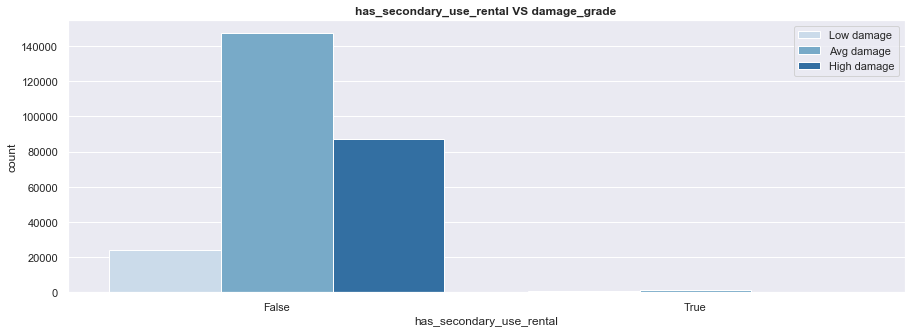

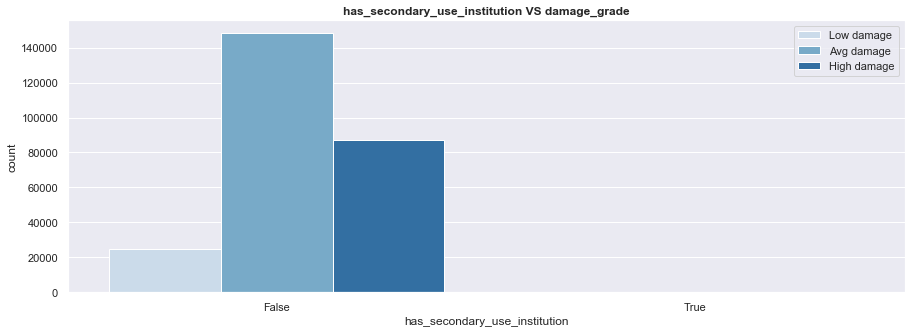

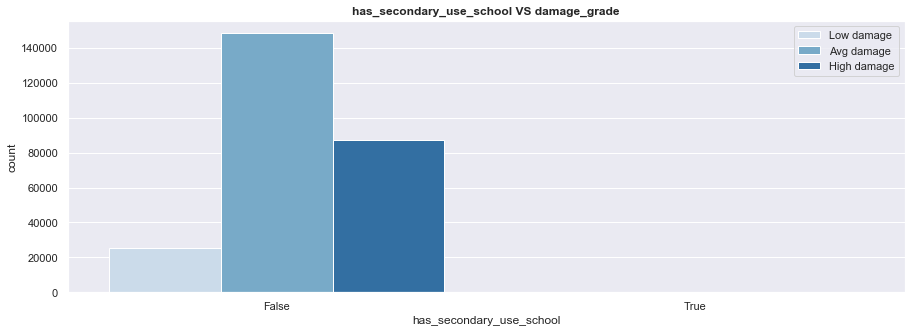

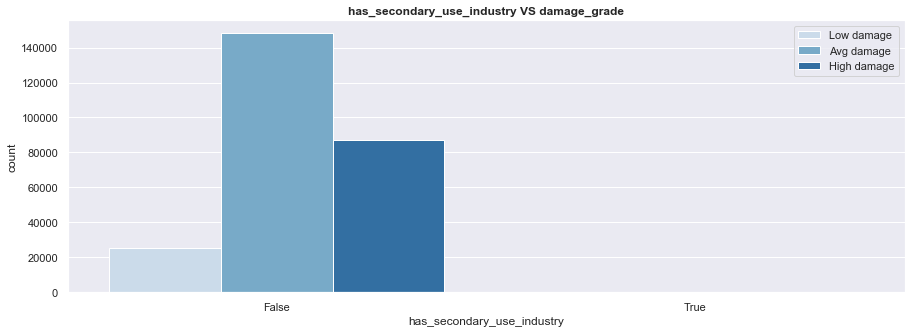

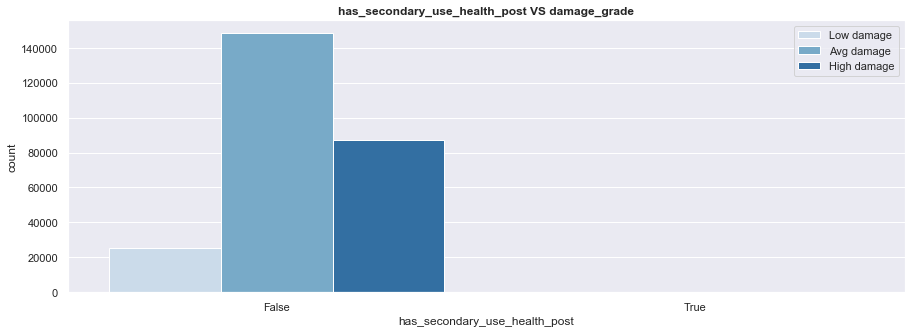

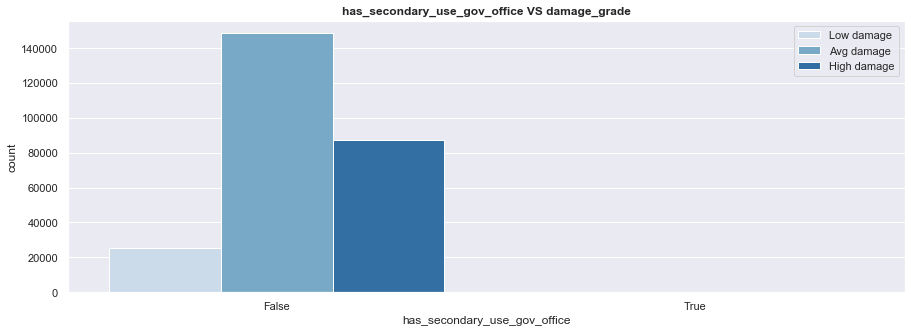

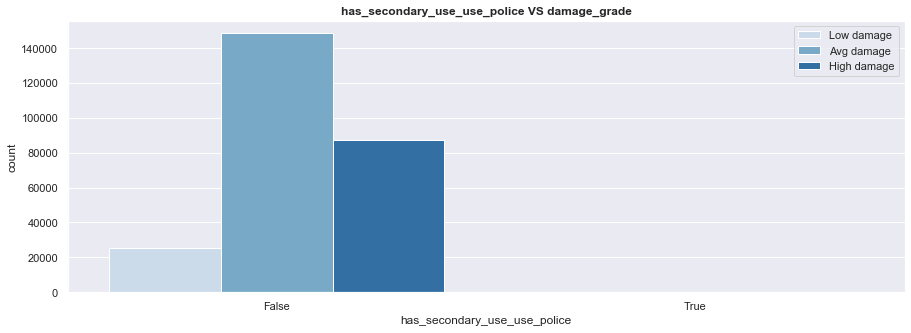

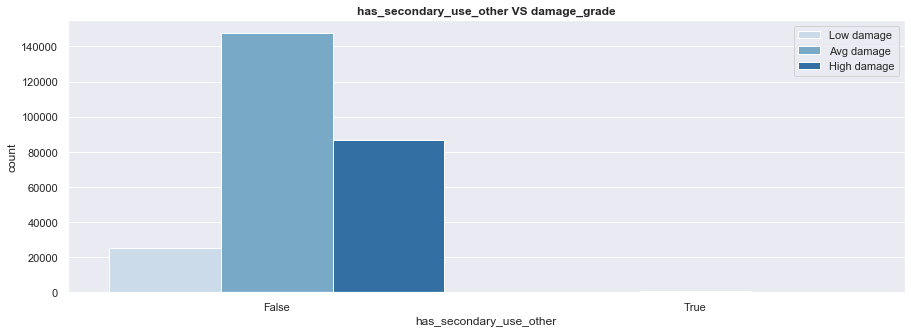

In [17]:
for col in binary_columns:
    plt.figure(figsize=(15,5))
    sb.countplot(combined_train[col],hue=combined_train['damage_grade'],palette="Blues")
    plt.title(col+ " VS damage_grade",fontweight="bold")
    plt.legend(["Low damage","Avg damage","High damage"]) 
    plt.show()

Highly imbalanced classes makes it difficult to conclude directly

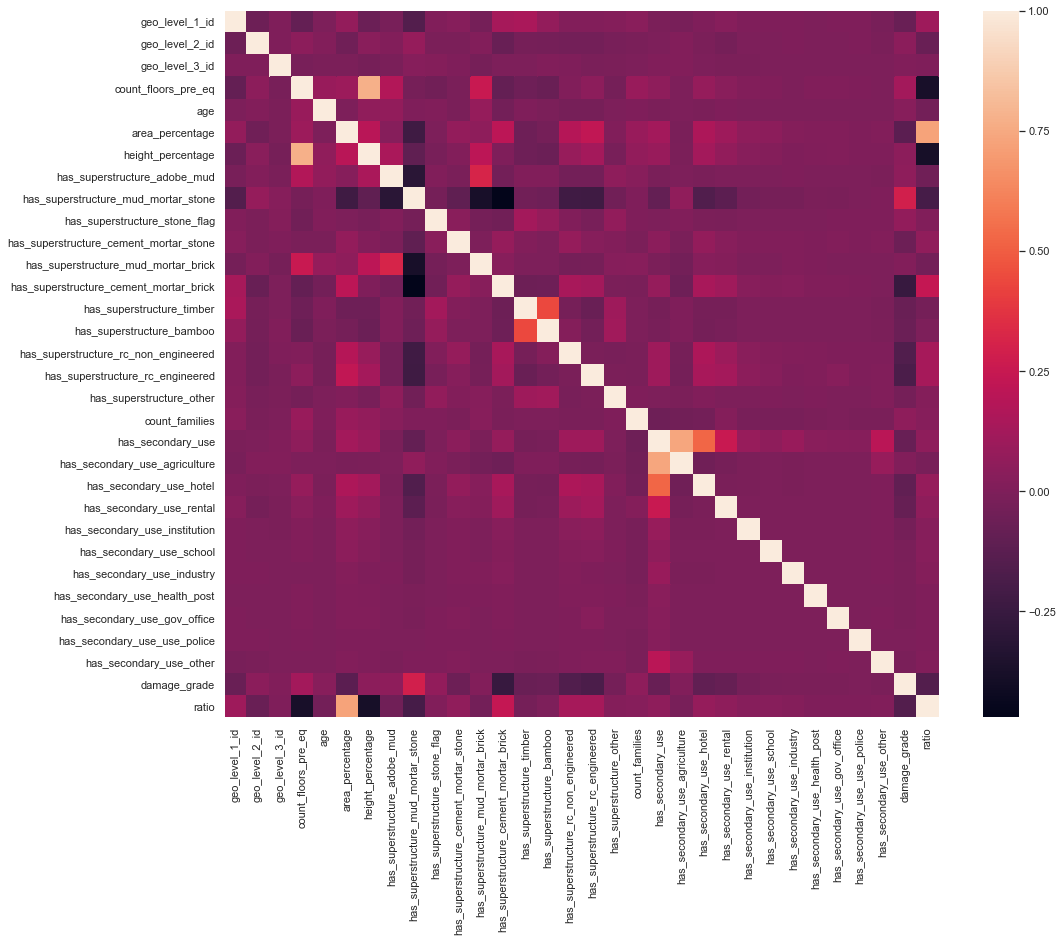

In [18]:
plt.figure(figsize=(16,13))
data_corr = combined_train.corr()
sb.heatmap(data_corr)
plt.show()

## Some other observations-
1. has_superstructure_timber bears strong correlation with has_superstructure_bamboo which could mean they are used together.
2. has_secondary_use bears maximum correlation with has_secondary_use_agriculture followed by has_secondary_use_hotel.

---
## Feature selection using SelectKBest
---
While we have shortlisted the notable features from visual analysis, they are less accurate since they are shortlisted by visual observations. We shall move on to a more accurate way to select features that affect `damage_grade`, by using the **SelectKBest** function that provides different statistical tests to find out which features have the strongest relationship with `damage_grade`.

#### Data Preparation

In [ ]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Converting alphabetical categorical columns to numeric categorical
for column in categorical_columns:
    train_values[column] = train_values[column].astype('category').cat.codes

Top 3 continuous features (out of 8)

In [ ]:
numerical_x_train = train_values[numerical_columns]
selector = SelectKBest(f_classif, 3).fit(numerical_x_train, train_labels.values.ravel())
cols = selector.get_support(indices=True)
features_df_new = numerical_x_train.iloc[:,cols]
best_num = list(features_df_new)
print(best_num)

Top 3 categorical features (out of 8)

In [ ]:
categorical_x_train = train_values[categorical_columns]
selector = SelectKBest(mutual_info_classif, 3).fit(categorical_x_train, train_labels.values.ravel())
cols = selector.get_support(indices=True)
features_df_new = categorical_x_train.iloc[:,cols]
best_cat = list(features_df_new)
print(best_cat)

Top 5 binary features (out of 22)

In [ ]:
binary_x_train = train_values[binary_columns]
selector = SelectKBest(mutual_info_classif, 5).fit(binary_x_train, train_labels.values.ravel())
cols = selector.get_support(indices=True)
features_df_new = binary_x_train.iloc[:,cols]
best_bin = list(features_df_new)
print(best_bin)